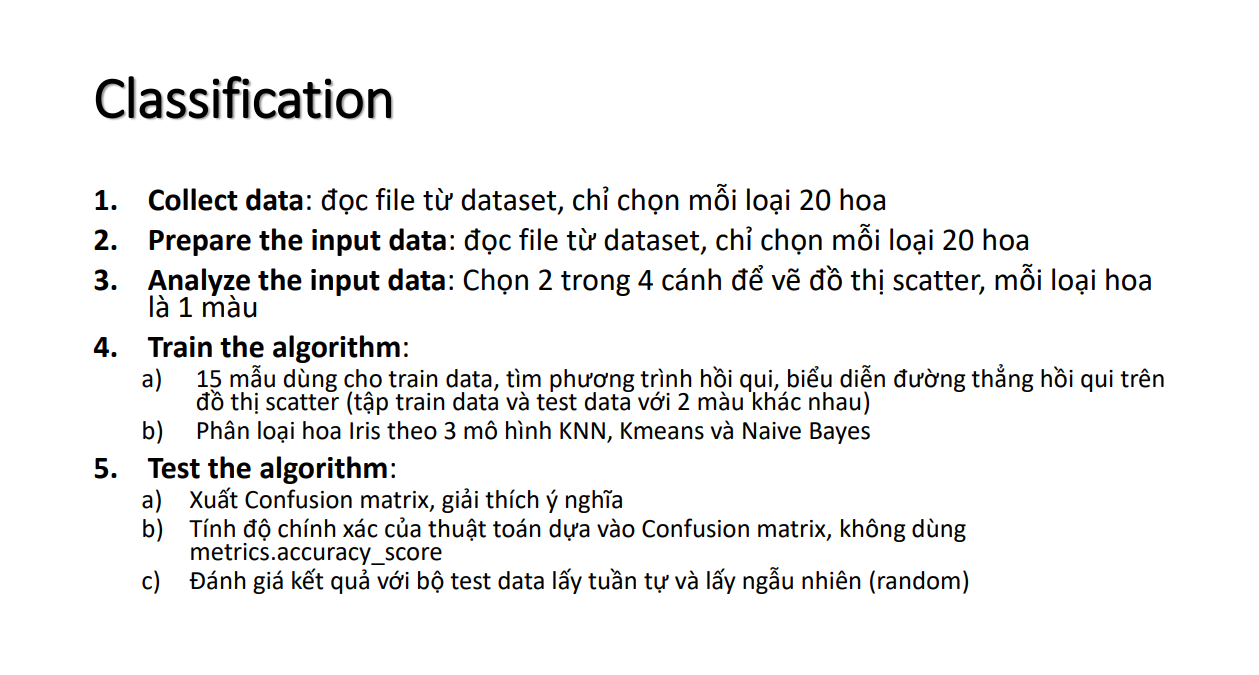

# Những nội dung bài làm mình chỉ làm để tham khảo, vào thi có cái để coi chứ ko phải cách làm chuẩn vì mình ko biết đề là gì nên các bạn coi chỉ mang tính chất tham khảo, ko phải bài mẫu để bám theo mà làm bài thi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
import sklearn.neighbors as neighbors
from sklearn import metrics

# 1. Collect data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/DangCao1999/ML-Study/master/BaiHoc/KNN%20Classification/data_iris.csv')

In [3]:
df.head()

,sepallength,sepalwidth,petallength,petalwidth,name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 2. Prepare the input data

Lấy dữ liệu theo điều kiện mỗi loại 20 hoa

In [10]:
data = df[df['name'] == 'Iris-setosa'].head(20)
data = X.append(df[df['name'] == 'Iris-versicolor'].head(20))
data = X.append(df[df['name'] == 'Iris-virginica'].head(20))

In [11]:
data.head(60)

,sepallength,sepalwidth,petallength,petalwidth,name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


# 3. Analyze the input data

## 3.1 Vẽ chập các thuojc tính với nhau

In [12]:
headers = df.columns.values.tolist()
print(headers)

['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'name']


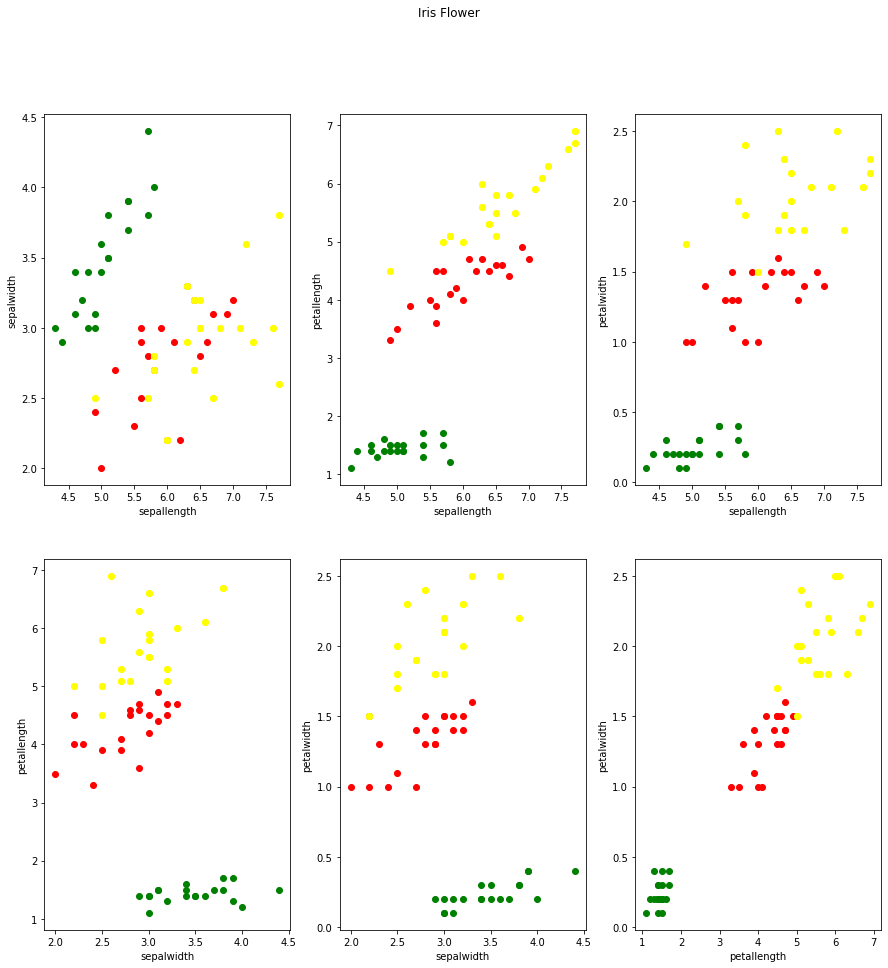

In [14]:
figure, axis = plt.subplots(2, 3, figsize=(15,15))
figure.suptitle("Iris Flower")
rows_number = 0;
cols_number = 0;
for i,col_name in enumerate(headers):
    iPlus = i + 1
    for j in range(iPlus, 4):
        header_X = headers[i]
        header_Y = headers[j]
        for indexTemp, row in data.iterrows():
            #check color with label
            if(row['name']) == "Iris-setosa":
                color = 'green'
            elif(row['name']) == "Iris-versicolor":
                color = 'red'
            else:
                color = 'yellow'
                
            #draw
            axisTemp = axis[rows_number, cols_number]
            axisTemp.scatter(row[header_X], row[header_Y], color=color)
            axisTemp.set_xlabel(header_X)
            axisTemp.set_ylabel(header_Y)

        if(cols_number >= 2):
            cols_number = 0
            rows_number += 1
        else:
            cols_number += 1

plt.show()

## 3.2 Vẽ với 2 thuộc tính đc chọn cụ thể

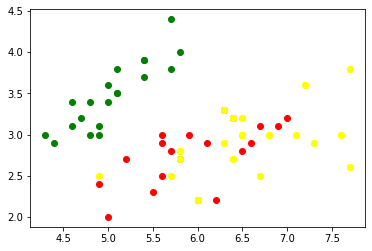

In [15]:
for index, row in data.iterrows():
    if(row['name']) == "Iris-setosa":
        color = 'green'
    elif(row['name']) == "Iris-versicolor":
        color = 'red'
    else:
        color = 'yellow'
    plt.scatter(row['sepallength'], row['sepalwidth'], color=color)
plt.show()

# 4. Train

In [16]:
X = data[['sepallength', 'sepalwidth']]
Y = data.name

In [18]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, Y, test_size=0.75, random_state=4)

In [19]:
knn = neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train.values, y_train) 

KNeighborsClassifier(n_neighbors=10)

In [20]:
y_pred = knn.predict(X_test.values)
print(y_pred)

['Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica']


# 5. Test

## Confusion matrix

In [21]:
confusion = metrics.confusion_matrix(y_test,y_pred)
print(confusion)

[[13  0  3]
 [ 4  0 13]
 [ 1  0 26]]


## Accuracy

In [22]:
total = 0
for i, row_values in enumerate(confusion):
    for j, cell_values in enumerate(row_values):
        # i == j sẽ là đường chéo, mà đường chéo là số lượng đúng nên mình bỏ qua
        if i != j:
            total += cell_values

In [23]:
print(y_test.shape[0])

60


In [24]:
accuracy = total / y_test.shape[0]

In [25]:
print(1 - accuracy)

0.65


In [26]:
# kiểm tra với accuracy của sklearn
print( "Accuracy : " + str(np.round(metrics.accuracy_score(y_test,y_pred),4)))

Accuracy : 0.65
